#Setup the Environment

In [ ]:
!pip install split-folders
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from PIL import Image
from tqdm import tqdm

import splitfolders

import random
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Download Dataset

In [ ]:
! pip install -q kaggle

#from google.colab import files
#_ = files.upload()

! mkdir -p ~/.kaggle
! cp "/content/drive/Shareddrives/DeepLearning-ArtClassification/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ikarus777/best-artworks-of-all-time --unzip

100% 2.29G/2.29G [00:17<00:00, 184MB/s]
100% 2.29G/2.29G [00:17<00:00, 142MB/s]


#Dataset Visualization

In [ ]:
df = pd.read_csv('/content/artists.csv')
df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [ ]:
! rm -r '/content/images/images/Albrecht_Du╠êrer'

! mv '/content/images/images/Albrecht_DuΓòá├¬rer' '/content/images/images/Albrecht_Dürer'



rm: cannot remove '/content/images/images/Albrecht_Du╠êrer': No such file or directory


In [ ]:
GENERAL_PATH = '/content/images/images'

class_cardinality={}

for it in os.scandir(GENERAL_PATH):
    if it.is_dir():
      class_cardinality[it.name]=len(os.listdir(it.path))

class_cardinality

{'Camille_Pissarro': 91,
 'Marc_Chagall': 239,
 'Gustave_Courbet': 59,
 'Pieter_Bruegel': 134,
 'Rembrandt': 262,
 'Piet_Mondrian': 84,
 'Frida_Kahlo': 120,
 'Vasiliy_Kandinskiy': 88,
 'Edouard_Manet': 90,
 'Vincent_van_Gogh': 877,
 'Raphael': 109,
 'Leonardo_da_Vinci': 143,
 'Michelangelo': 49,
 'Claude_Monet': 73,
 'Henri_Rousseau': 70,
 'Rene_Magritte': 194,
 'Paul_Klee': 188,
 'William_Turner': 66,
 'Georges_Seurat': 43,
 'Paul_Gauguin': 311,
 'Titian': 255,
 'Andy_Warhol': 181,
 'El_Greco': 87,
 'Joan_Miro': 102,
 'Gustav_Klimt': 117,
 'Andrei_Rublev': 99,
 'Kazimir_Malevich': 126,
 'Salvador_Dali': 139,
 'Diego_Rivera': 70,
 'Jan_van_Eyck': 81,
 'Francisco_Goya': 291,
 'Paul_Cezanne': 47,
 'Henri_de_Toulouse-Lautrec': 81,
 'Giotto_di_Bondone': 119,
 'Jackson_Pollock': 24,
 'Pablo_Picasso': 439,
 'Caravaggio': 55,
 'Sandro_Botticelli': 164,
 'Amedeo_Modigliani': 193,
 'Diego_Velazquez': 128,
 'Hieronymus_Bosch': 137,
 'Pierre-Auguste_Renoir': 336,
 'Edgar_Degas': 702,
 'Henri_Mati

In [ ]:
int(len(class_cardinality)/3)

16

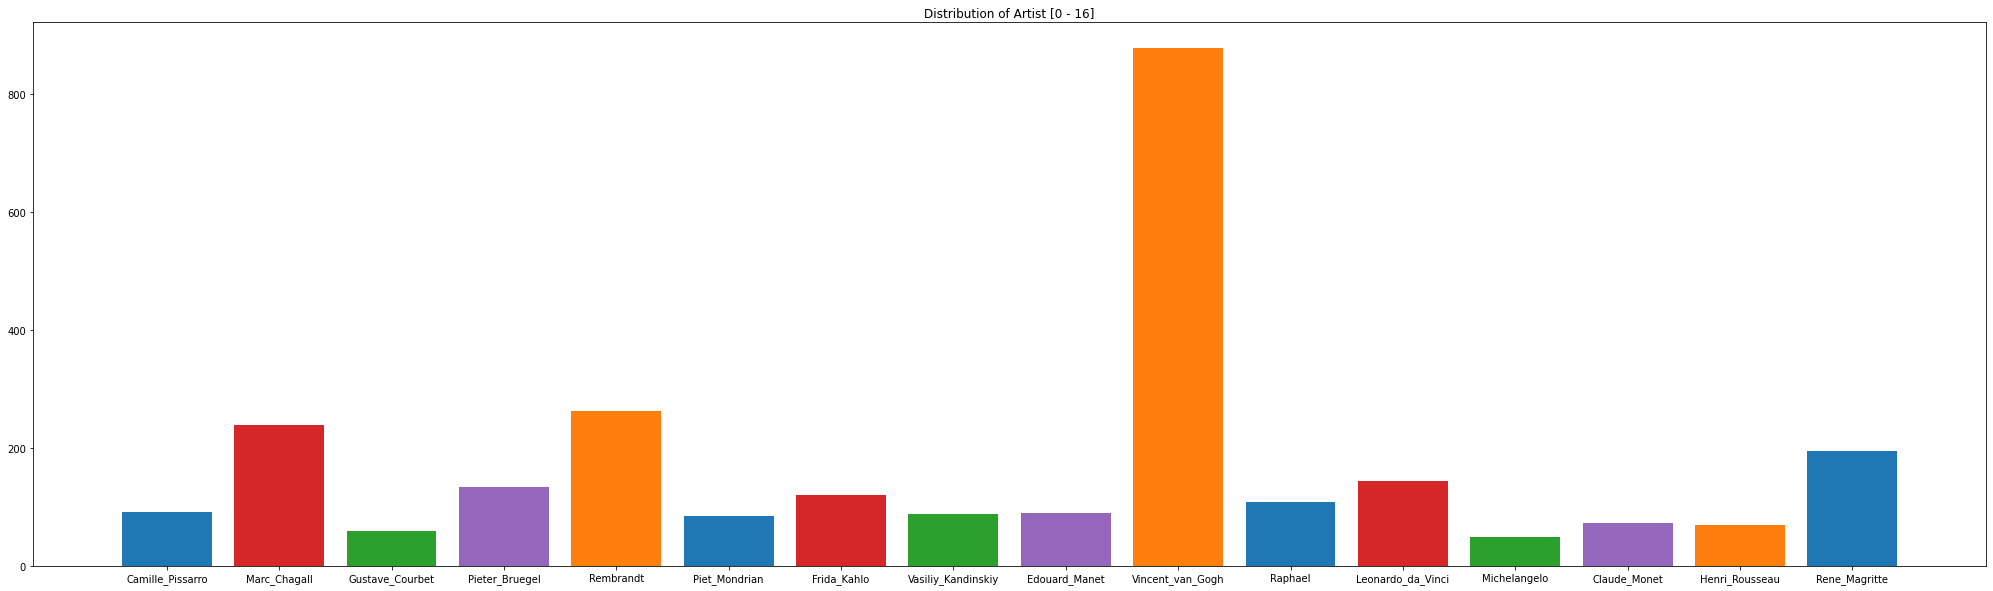

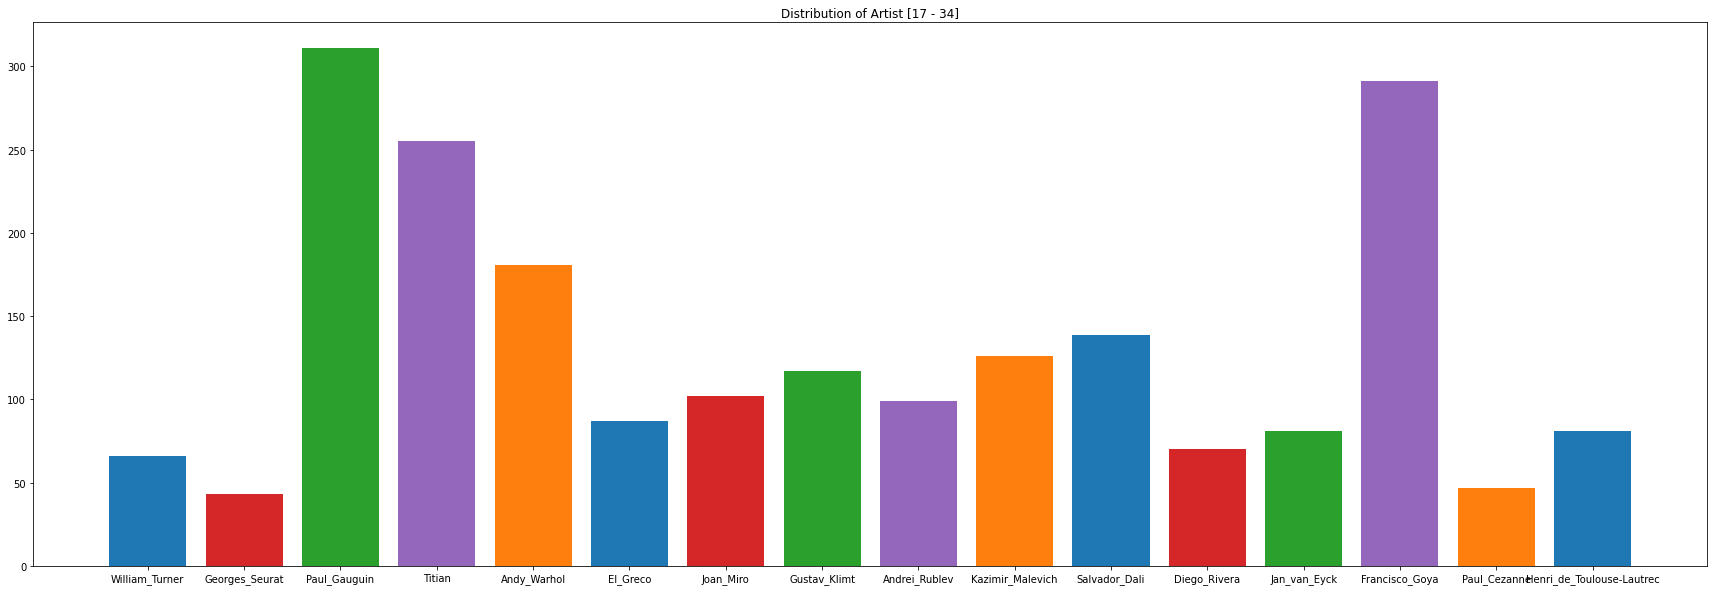

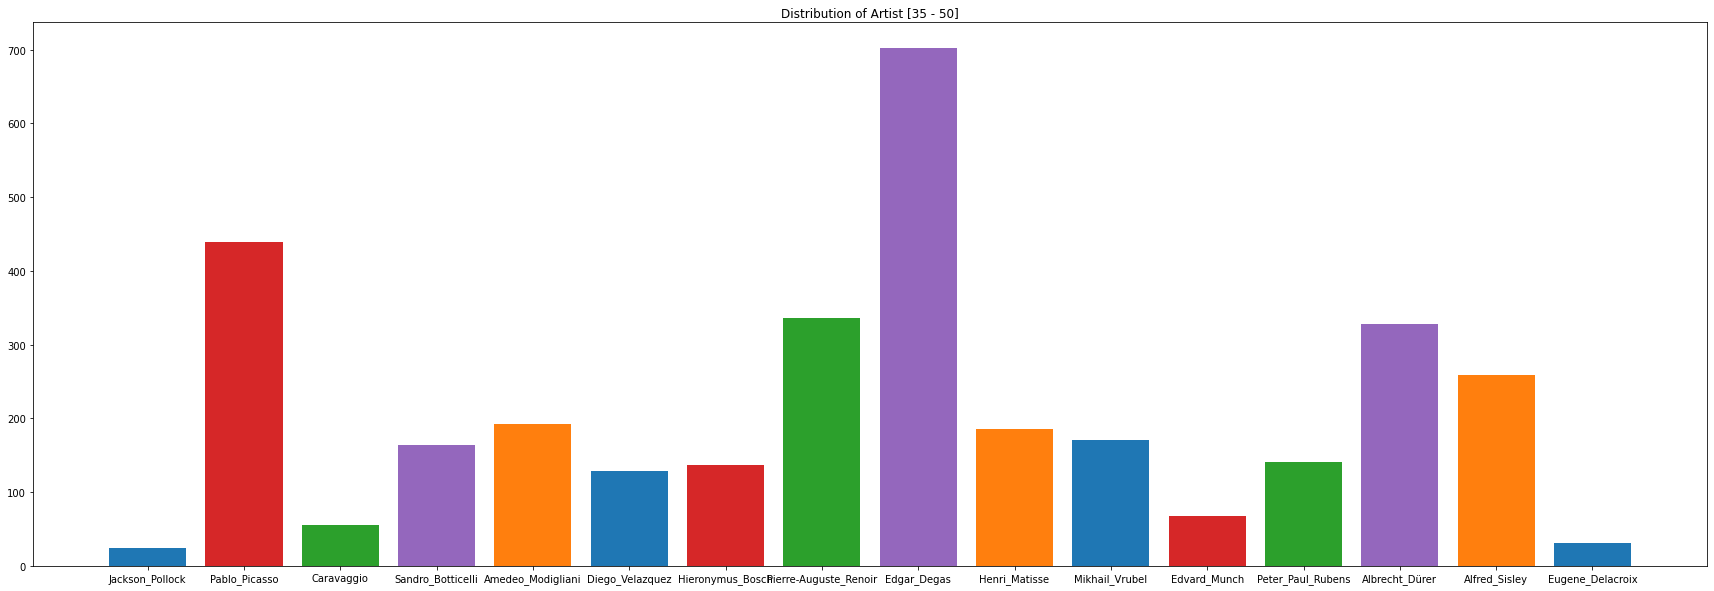

In [ ]:
plt.figure(figsize=(35,10))
plt.bar(range(int(len(class_cardinality)/3)), list(class_cardinality.values())[:16], align='center', color=['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange'])
plt.xticks(range(int(len(class_cardinality)/3)), list(class_cardinality.keys())[:16])
plt.title("Distribution of Artist [0 - 16]")
plt.show()


plt.figure(figsize=(30,10))
plt.bar(range(int(len(class_cardinality)/3)), list(class_cardinality.values())[17:33], align='center', color=['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange'])
plt.xticks(range(int(len(class_cardinality)/3)), list(class_cardinality.keys())[17:33])
plt.title("Distribution of Artist [17 - 34]")
plt.show()


plt.figure(figsize=(30,10))
plt.bar(range(int(len(class_cardinality)/3)), list(class_cardinality.values())[34:50], align='center', color=['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange'])
plt.xticks(range(int(len(class_cardinality)/3)), list(class_cardinality.keys())[34:50])
plt.title("Distribution of Artist [35 - 50]")
plt.show()

In [ ]:
CLASS = []
for key in class_cardinality:
  if class_cardinality[key] > 200:
    CLASS.append(key)

new_class_cardinality = {}

for artist in CLASS:
  new_class_cardinality[artist] = class_cardinality[artist]

new_class_cardinality

{'Marc_Chagall': 239,
 'Rembrandt': 262,
 'Vincent_van_Gogh': 877,
 'Paul_Gauguin': 311,
 'Titian': 255,
 'Francisco_Goya': 291,
 'Pablo_Picasso': 439,
 'Pierre-Auguste_Renoir': 336,
 'Edgar_Degas': 702,
 'Albrecht_Dürer': 328,
 'Alfred_Sisley': 259}

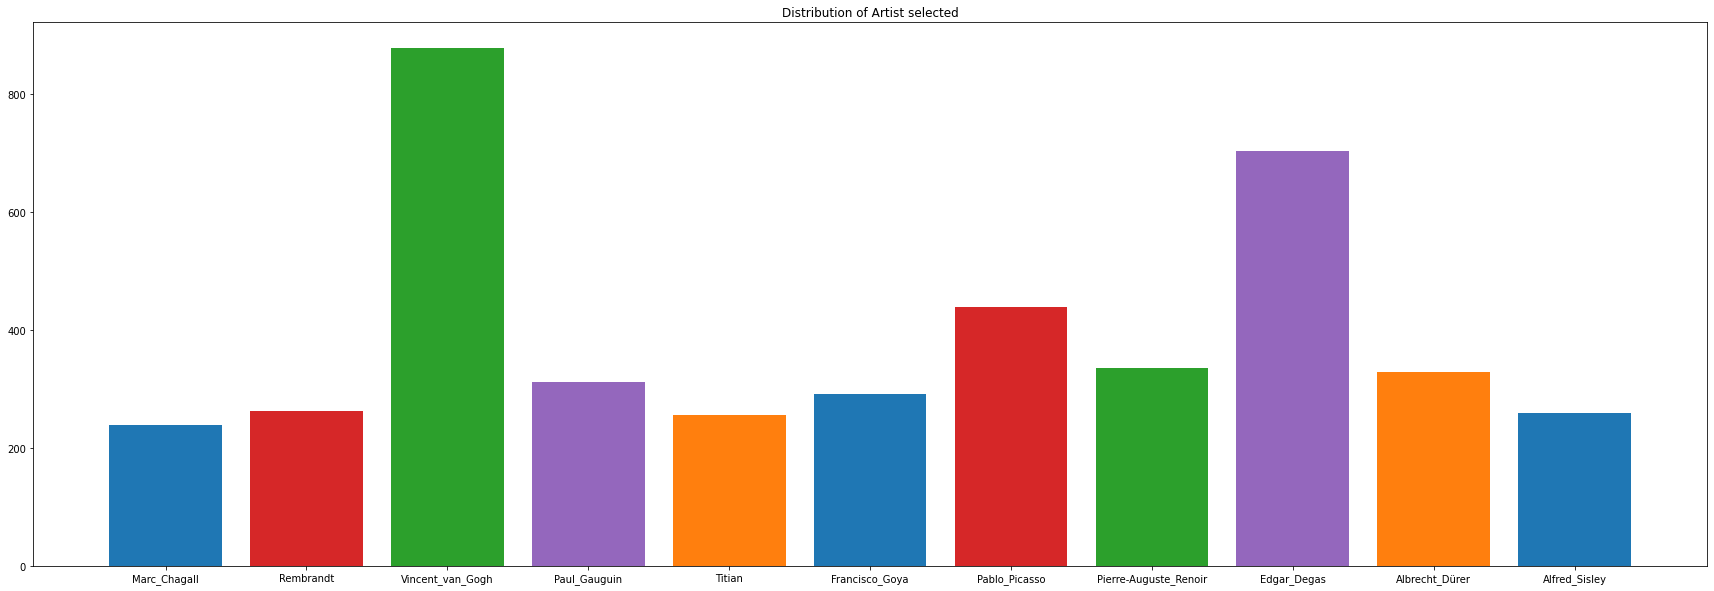

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(range(len(new_class_cardinality)), list(new_class_cardinality.values()), align='center', color=['tab:blue', 'tab:red', 'tab:green', 'tab:purple', 'tab:orange'])
plt.xticks(range(len(new_class_cardinality)), list(new_class_cardinality.keys()))
plt.title("Distribution of selected Artist")
plt.show()

# Resize images 


We decided to resize images in order to get a manageable size of dataset easy handable in Colab.

In [ ]:
BASE_DIR = '/content/images/images'
def resize_images(output_dir, new_width, new_height):
  # Iterate over the input images

  for artist in tqdm(CLASSES):

    artist_dir = os.path.join(BASE_DIR, artist)
    for str_image in os.listdir(artist_dir):
      
      image_path = os.path.join(artist_dir, str_image)
      # Extract the filename from the path and save the resized image
      #filename = image_path.split("/")[-1]
      if not os.path.exists(output_dir + "/" + artist):

        # if the demo_folder directory is not present 
        # then create it.
        os.makedirs(output_dir + "/" + artist)
        

      # Read the image and resize it
      image = Image.open(image_path)
      image = image.resize((new_width, new_height), Image.ANTIALIAS)

      #print(output_dir + "/" + artist + "/" + str_image) 
      image.save(output_dir + "/" + artist + "/" + str_image)

# Define the paths to the input and output directories
output_dir = "images-resized"

# Define the new width and height for the images
new_width = 224
new_height = 224


# Resize the images
resize_images(output_dir, new_width, new_height)

100%|██████████| 11/11 [02:21<00:00, 12.83s/it]


In [ ]:
import shutil
shutil.make_archive("/content/images-resized", 'zip', "/content/images-resized")

'/content/images-resized.zip'

In [ ]:
! cp -r "/content/images-resized" "/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/"

In [ ]:
! cp -r "/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/wikiart-resized" "/content/wikiart-resized"

# Exploratory Data Analysis



In [ ]:
! mkdir "/content/images-resized/"
! unzip -qq "/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/images-resized.zip" -d "/content/images-resized/"

DATASET_RESIZED_PATH = "/content/images-resized"

In [ ]:
def show_samples(num_samples, base_dir):
  plt.figure(figsize=(20, 80))
  i = 0
  for label in CLASSES:
    path = base_dir + '/' + label
    for img_name in os.listdir(path):
      img = mpimg.imread(path + "/" + img_name)
      ax = plt.subplot(len(CLASSES), num_samples, i + 1)
      plt.imshow(img.astype("uint8"))
      plt.title(label)
      plt.axis("off")
      i += 1
      if i % num_samples == 0:
        break

In [ ]:
show_samples(4, DATASET_RESIZED_PATH)

Output hidden; open in https://colab.research.google.com to view.

# Generation of Learning Sets

We generate two different directories:


*   One directory contains the unbalanced datatset split with 70% 15% 15%
*   The second directory contains the balanced dataset with the augmented training set

We decided to split in this way to compare performances between the balanced and unbalanced dataset



In [ ]:
CLASSES = ['Paul_Gauguin',
 'Edgar_Degas',
 'Vincent_van_Gogh',
 'Albrecht_Dürer',
 'Pablo_Picasso',
 'Titian',
 'Francisco_Goya',
 'Marc_Chagall',
 'Pierre-Auguste_Renoir',
 'Alfred_Sisley',
 'Rembrandt']

## Unbalanced Dataset

In [ ]:
! mkdir '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset-unbalanced'

In [ ]:
splitfolders.ratio('/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/images-resized', output='/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset-unbalanced', seed=47, ratio=(0.7, 0.15, 0.15), group_prefix=None)

Copying files: 4299 files [01:21, 53.06 files/s] 


## Rebalancing with Data Augmentation

In [ ]:
! mkdir '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset-augmented'

splitfolders.ratio('/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/images-resized', output='/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset-augmented', seed=47, ratio=(0.7, 0.15, 0.15), group_prefix=None)

In [ ]:
TRAIN_PATH = '/content/drive/Shareddrives/DeepLearning-ArtClassification/Data/Split-dataset-augmented/train'
train_class_cardinality={}

for artist in tqdm(CLASSES):
  dir = os.path.join(TRAIN_PATH, artist)
  train_class_cardinality[artist]=len(os.listdir(dir))

train_class_cardinality

100%|██████████| 11/11 [00:00<00:00, 151.70it/s]


{'Paul_Gauguin': 217,
 'Edgar_Degas': 491,
 'Vincent_van_Gogh': 613,
 'Albrecht_Dürer': 229,
 'Pablo_Picasso': 307,
 'Titian': 178,
 'Francisco_Goya': 203,
 'Marc_Chagall': 167,
 'Pierre-Auguste_Renoir': 235,
 'Alfred_Sisley': 181,
 'Rembrandt': 183}

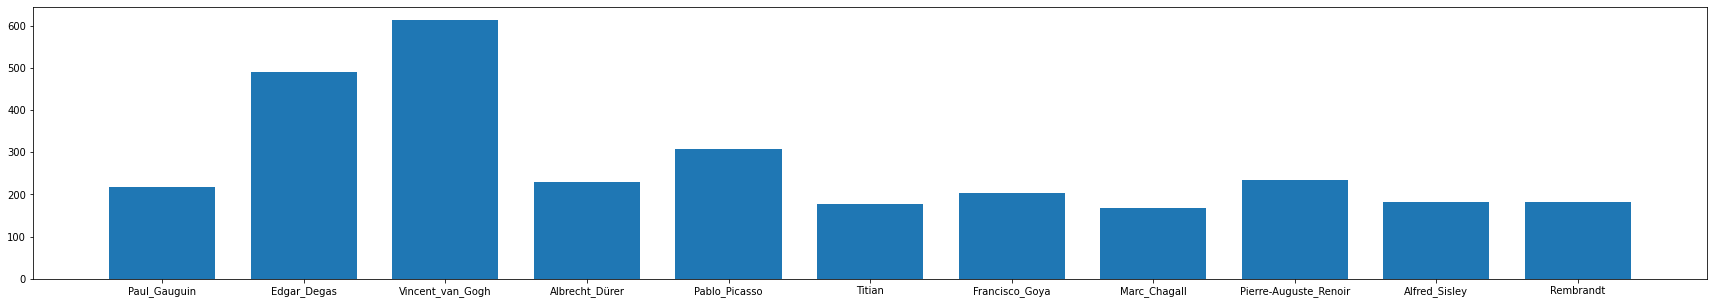

In [ ]:
num_x_class = list(train_class_cardinality.values())
plt.figure(figsize=(30,5))
plt.bar(range(len(CLASSES)), num_x_class, tick_label=CLASSES, width=0.75)

plt.show()

In [ ]:
def data_augmentation(image, base_path, counter):
  seq = iaa.Sequential([
      iaa.Fliplr(0.5), # flip image with 50% probability
      iaa.Sometimes(0.5, iaa.Rotate(90)), # rotate image by 90 with 50% probability
      iaa.GaussianBlur(sigma=(0, 1.5)) # apply gaussian blur with sigma between 0 and 1.5
  ])

  # Applica le trasformazioni all'immagine
  image_aug = seq.augment_image(image)
  
  filename = str(counter) + ".jpg"
 
  Image.fromarray(image_aug).save(os.path.join(base_path, filename))

In [ ]:
CARDINALITY_THRESHOLD = 500
for artist in tqdm(CLASSES):
  dir = os.path.join(TRAIN_PATH, artist)
  if len(os.listdir(dir)) < CARDINALITY_THRESHOLD:
    initial_len = len(os.listdir(dir))
    counter = 0
    while len(os.listdir(dir)) < CARDINALITY_THRESHOLD:
      image_list = os.listdir(dir)
      index = random.randrange(0, initial_len)
      image_path = os.path.join(dir, image_list[index])
      image = Image.open(image_path)
      image = np.array(image)
      data_augmentation(image, dir, counter)
      counter += 1

100%|██████████| 11/11 [01:36<00:00,  8.77s/it]


In [ ]:
for artist in CLASSES:
  dir = os.path.join(TRAIN_PATH, artist)
  print(len(os.listdir(dir)))

500
500
613
500
500
500
500
500
500
500
500
